# Exercise 05

The result will be evaluated from a report in Jupyter, which must be found in a public GitHub repository.
The project must be carried out in the groups assigned in class.
Use clear and rigorous procedures.
Due date: July 11, 2021, 11:59 pm, through Bloque Neón + (Upload repository link)

## Using the example_retail_sales dataset:
- Standardize the dataset using np.log
- Using prophet forescast the next 6 months of the sales logarithm
- Predict the next 6 months of sales

### Solution

Andres Felipe Díaz Méndez - 201924178

Arvid Tenganá Hurtado - 201527819

Juan David Barreto Pérez- 202020148

Juan Felipe Martínez Ramos - 201113765

Luis Miguel Torres Aponte - 202022939


github: https://github.com/zerodarkzone/AdvancedMethodsDataAnalysisClassGrupo4202119/

In [10]:
from prophet.plot import add_changepoints_to_plot
from prophet import Prophet
import pandas as pd
import numpy as np
%matplotlib inline

First, we read the data set using pandas and change de type of the 'ds' column to a datetime.

In [11]:
retail_sales = pd.read_csv('../datasets/example_retail_sales.csv')

In [12]:
retail_sales["ds"] = pd.to_datetime(retail_sales['ds'])

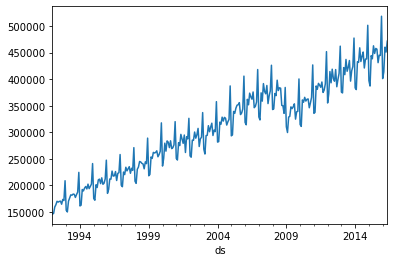

In [13]:
retail_sales.set_index("ds")['y'].plot()

We apply the 'log' function to the variable to standardize the data and plot it.

In [14]:
retail_sales["y"] = np.log(retail_sales["y"])

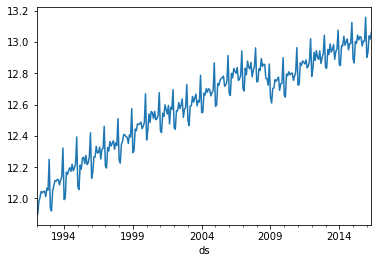

In [15]:
retail_sales.set_index("ds")['y'].plot()

At last, we fit the data to the prophet model.

In [28]:
m = Prophet()
m.fit(retail_sales)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


We make the prediction for the next 6 months

In [34]:
future = m.make_future_dataframe(periods=6, freq='M')
future.tail(6)

,ds
293,2016-05-31
294,2016-06-30
295,2016-07-31
296,2016-08-31
297,2016-09-30
298,2016-10-31


We make the prediction

In [35]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
294,2016-06-30,13.057700,13.038178,13.078477
295,2016-07-31,13.082357,13.061330,13.101289
296,2016-08-31,13.015546,12.995260,13.036791
297,2016-09-30,13.037862,13.015261,13.058528
298,2016-10-31,13.055691,13.033097,13.077438


We plot the forecast of the next 6 months and plot the trend and the seasonality of the data

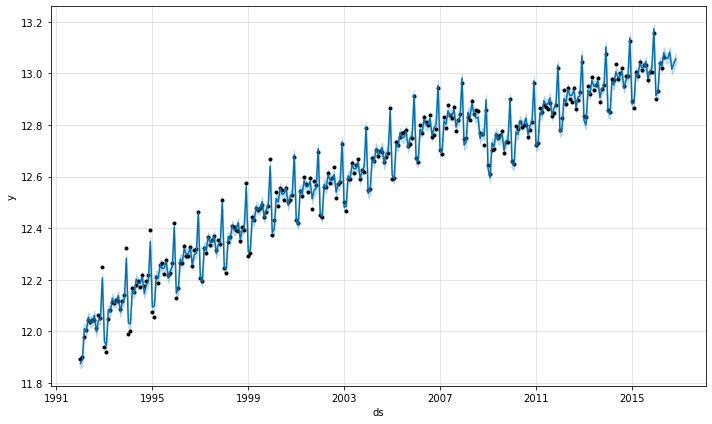

In [36]:
fig1 = m.plot(forecast)

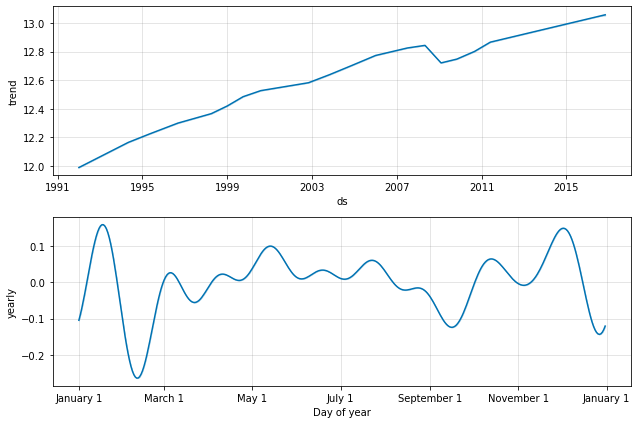

In [37]:
m.plot_components(forecast);

We can see that the data has an upwards trend and a yearly seasonality.